In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from module import (
    extract_features_from_mol,
    numerical_separator,
    standardizer,
    enrich
)

In [101]:
TrainingData = pd.read_csv('train_cddd_merged.csv') #cleaned, standardized, and merged with cddd
TrainingData = enrich(TrainingData) # enriched mol and lab features

# Data Visualisation

## RT Distribution

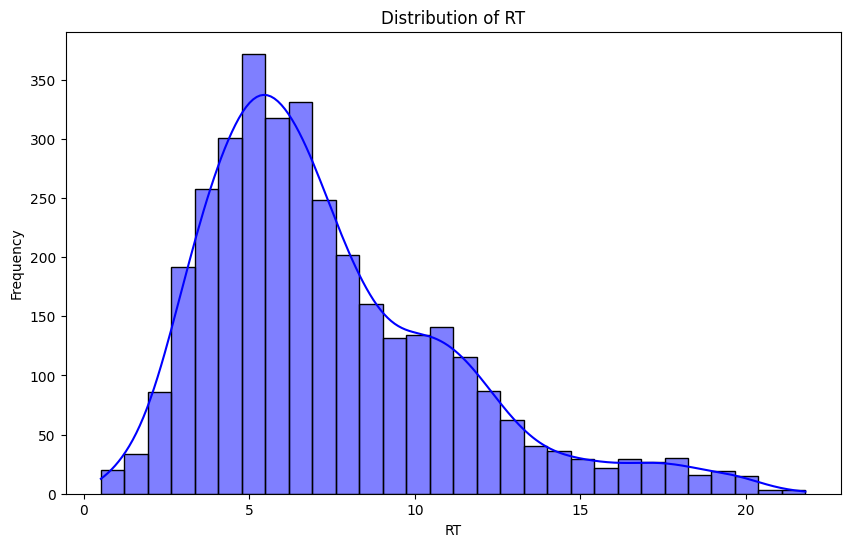

In [102]:
def plot_histogram(data, feature='RT'):
    """
    Plot a histogram of the distribution of a feature in a DataFrame.

    Parameters:
    - data: pd.DataFrame, the input dataset
    - feature: str, the name of the feature to plot (default is 'RT')
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    
plot_histogram(TrainingData)

## Correlation matrix

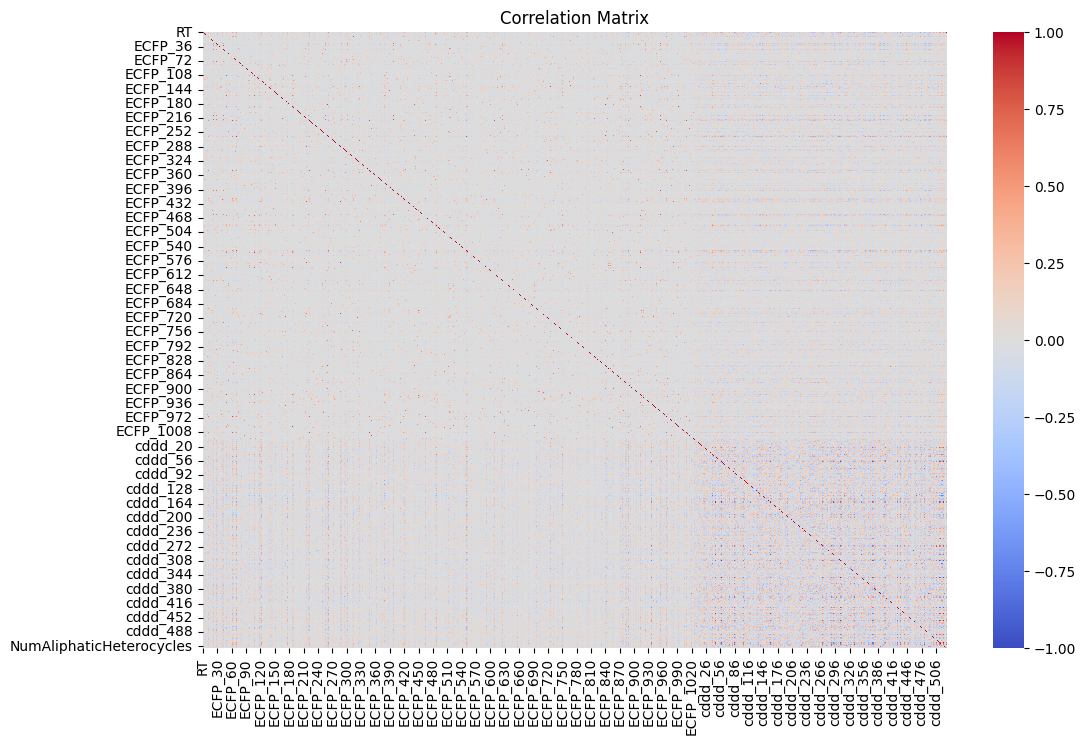

In [103]:
def correlation_matrix (data):
    """
    Calculate the correlation matrix for numeric columns in a DataFrame.

    Parameters:
    - data (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: Correlation matrix for numeric columns.
    """
    # non-numeric columns are excluded (we only use the ones converted to numeric)
    numeric_df = data.select_dtypes(include=['float64', 'int64'])

    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()
    
    return correlation_matrix

corr_matrix=correlation_matrix(TrainingData)

def plot_correlation_matrix (data) :
    """
    Plot the correlation matrix using a heatmap.

    Parameters:
    - matrix (pd.DataFrame): Correlation matrix.

    Returns:
    - None
    """
    # Plot the correlation matrix using seaborn
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix(data), annot=False, cmap='coolwarm',vmin=-1, vmax=1, center=0)
    plt.title('Correlation Matrix')
    plt.show()
    return None
    
plot_correlation_matrix(TrainingData)

In [104]:
print(corr_matrix.iloc[:5, :5])

              RT    ECFP_1    ECFP_2    ECFP_3    ECFP_4
RT      1.000000 -0.064397 -0.122242  0.154831  0.010512
ECFP_1 -0.064397  1.000000 -0.085601 -0.028429 -0.015604
ECFP_2 -0.122242 -0.085601  1.000000 -0.001007 -0.022695
ECFP_3  0.154831 -0.028429 -0.001007  1.000000 -0.023284
ECFP_4  0.010512 -0.015604 -0.022695 -0.023284  1.000000


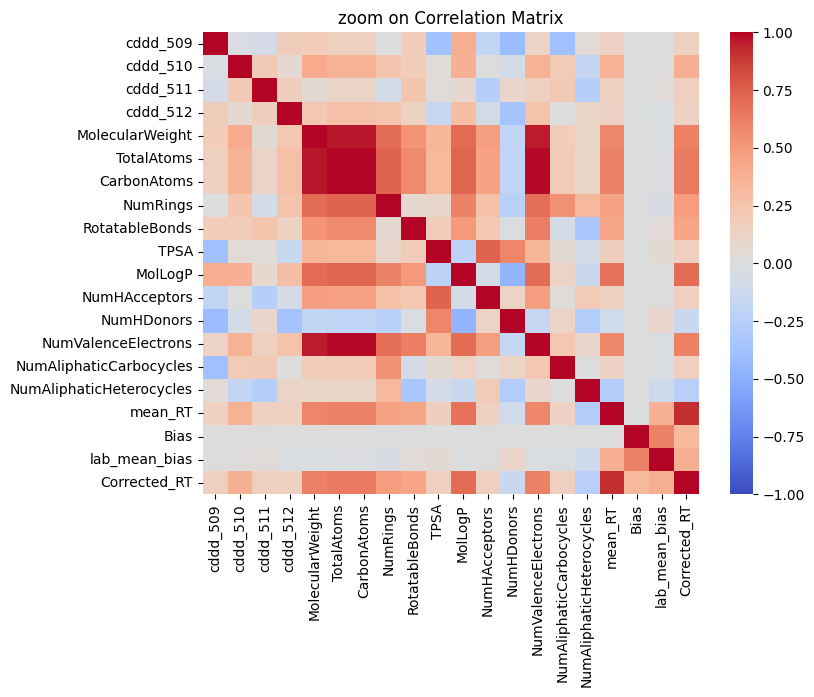

In [105]:
# Plot a smaller version of the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.iloc[-20:, -20:], annot=False, cmap='coolwarm',vmin=-1, vmax=1, center=0)
plt.title('zoom on Correlation Matrix')
plt.show()

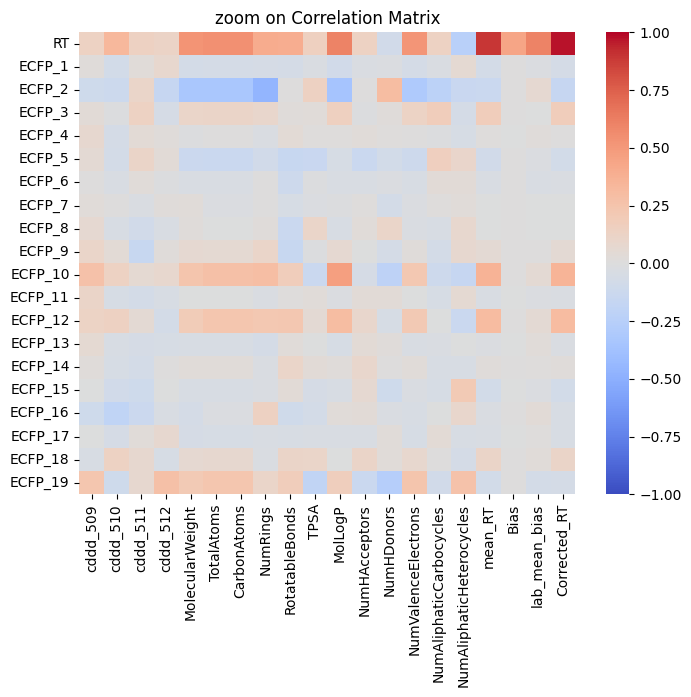

In [106]:
# Plot a smaller version of the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.iloc[:20, -20:], annot=False, cmap='coolwarm',vmin=-1, vmax=1, center=0)
plt.title('zoom on Correlation Matrix')
plt.show()

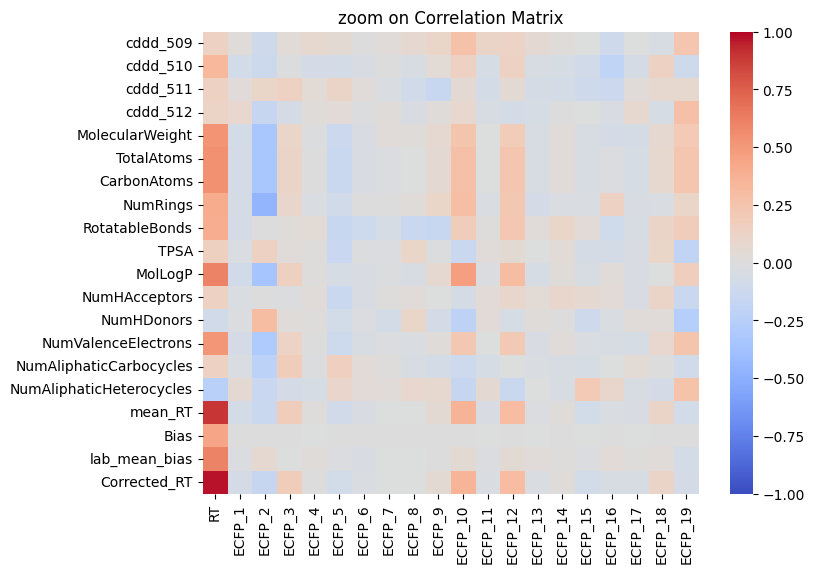

In [107]:
# Plot a smaller version of the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.iloc[-20:, :20], annot=False, cmap='coolwarm',vmin=-1, vmax=1, center=0)
plt.title('zoom on Correlation Matrix')
plt.show()

The first column represents the correlation between RT and the other features : we want a strong correlation
All the other columns represent the pairwise correlations between all the other features : we want a weak correlation

en fait l'utilistation depend grandement de comment on est evalués :
si on a le lab en input: on utilise l colomne lab mean avg 
si on a pas le lab en input : on utilise le corrected rt instead of rt 